2DOF :  2 angles
Circular obstacles that it cannot bump into
1. Calculate config space for these two robots 
2. Make arms rectangular 
3. You can decide length and width of arms
4. 3 spheres obstacles -> you decide diameter and location
5. Calculate configuration space by randomly sampling and see if it collides
    1. Sample every combination 
    2. Get an image  - > (workspace, config_space)
6.  Train from work space to estimate config space
    1. See if shape 


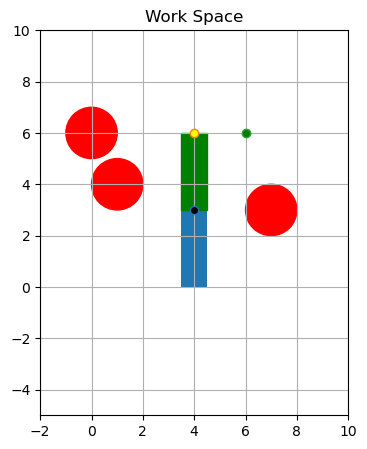

In [48]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

robot_arm1 = Polygon([
   (3.5, 0),
    (3.5,3),
   (4.5, 3),
    (4.5,0)
])


robot_arm2 = Polygon([
   (3.5, 3),
    (3.5,6),
    (4.5,6),
    (4.5, 3),
])


rx, ry = robot_arm1.exterior.xy
black = [[4],[3]]
start = [[4],[6]]
goal = [[6],[6]]

fig,ax = plt.subplots(figsize=(5,5))
obstacle_1 = plt.Circle((0,6),1,color='r')
obstacle_2 = plt.Circle((1,4),1,color='r')
obstacle_3 = plt.Circle((7,3),1,color='r')
ax.fill(*robot_arm1.exterior.xy)
ax.fill(*robot_arm2.exterior.xy,color='green')
ax.plot(black[0],black[1],marker="o",markerfacecolor="black")
ax.plot(start[0],start[1],marker="o",markerfacecolor="yellow")
ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")


ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([-5,10])
ax.set_aspect( 1 )
ax.add_artist(obstacle_1)
ax.add_artist(obstacle_2)
ax.add_artist(obstacle_3)
plt.grid()


In [74]:
# different poositions of first arm:
import math
results = []
len_arm = 3
x_offset = 4
for i in range(181):
    x,y = len_arm * math.cos(math.radians(i)),len_arm * math.sin(math.radians(i))
    results.append([x+x_offset,y])

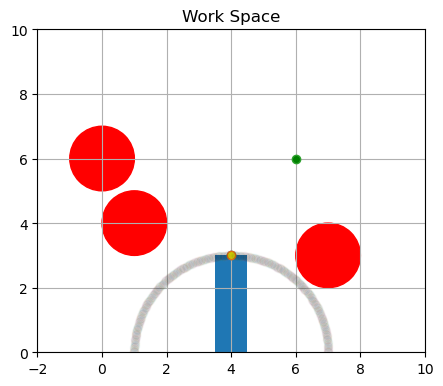

In [75]:

from shapely.geometry import Polygon
import matplotlib.pyplot as plt

robot_arm1 = Polygon([
   (3.5, 0),
    (3.5,3),
   (4.5, 3),
    (4.5,0)
])

rx, ry = robot_arm1.exterior.xy
black = [[4],[3]]
start = [[4],[3]]
goal = [[6],[6]]

fig,ax = plt.subplots(figsize=(5,5))
obstacle_1 = plt.Circle((0,6),1,color='r')
obstacle_2 = plt.Circle((1,4),1,color='r')
obstacle_3 = plt.Circle((7,3),1,color='r')
ax.fill(*robot_arm1.exterior.xy)
ax.plot(black[0],black[1],marker="o",markerfacecolor="black")
ax.plot(start[0],start[1],marker="o",markerfacecolor="yellow")
ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")
ax.plot()

for pt in results:
    ax.plot(pt[0],pt[1],marker='o',markerfacecolor='black',alpha=.05)


ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([0,10])
ax.set_aspect( 1 )
ax.add_artist(obstacle_1)
ax.add_artist(obstacle_2)
ax.add_artist(obstacle_3)
plt.grid()


In [76]:
# different poositions of first arm:
import math
results = []
len_arm_1 = 3
len_arm_2 = 3
x_offset = 4
y_offset = 0
for i in range(181):
    arm_1_x,arm_1_y = len_arm_1 * math.cos(math.radians(i)) + x_offset,len_arm_1 * math.sin(math.radians(i)) + y_offset        
    for j in range(181):
        arm_2_x = len_arm_2 * math.cos(math.radians(j)) + arm_1_x
        arm_2_y = len_arm_2 * math.sin(math.radians(j)) + arm_1_y
        results.append([arm_2_x,arm_2_y])


In [77]:
def get_points_discret(x_offset,y_offset,len_q1,len_q2,q1,q2):
    results = []
    for i in q1:
        arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
        for j in q2:
            arm_2_x,arm_2_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y
            results.append((arm_2_x,arm_2_y))
    return results

In [78]:
def get_points_continuous(x_offset,y_offset,len_q1,len_q2,q1,q2):
    results = []
    count = 0
    for i in range(q1[0],q1[1]+1):
        arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
        for j in range(q2[0],q2[1]+1):
            count += 1
            arm_2_x,arm_2_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y
            results.append((arm_2_x,arm_2_y))
    return results

In [79]:
points_c  = get_points_continuous(4,0,3,3,[0,180],[0,180])

In [ ]:
def get_points_continuous(x_offset,y_offset,len_q1,len_q2,q1,q2):
    results = []
    count = 0
    for i in range(q1[0],q1[1]+1):
        arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
        for j in range(q2[0],q2[1]+1):
            count += 1
            arm_2_x,arm_2_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y
            results.append((arm_2_x,arm_2_y))
    return results

In [80]:
i = 90
j = 45
len_q1 = len_q2 = 3
x_offset = 4
y_offset = 0

arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
goal_x,goal_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y


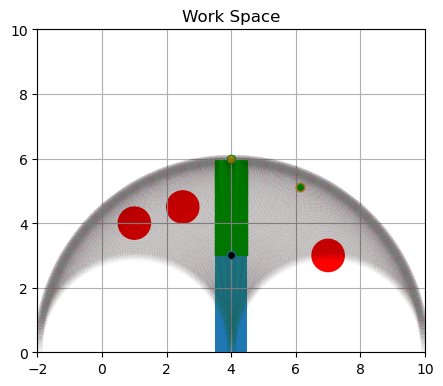

In [81]:
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

robot_arm1 = Polygon([
   (3.5, 0),
    (3.5,3),
   (4.5, 3),
    (4.5,0)
])


robot_arm2 = Polygon([
   (3.5, 3),
    (3.5,6),
    (4.5,6),
    (4.5, 3),
])


rx, ry = robot_arm1.exterior.xy
black = [[4],[3]]
start = [[4],[6]]
goal = [goal_x,goal_y]
fig,ax = plt.subplots(figsize=(5,5))
obstacle_1 = plt.Circle((2.5,4.5),.5,color='r')
obstacle_2 = plt.Circle((1,4),.5,color='r')
obstacle_3 = plt.Circle((7,3),.5,color='r')
ax.fill(*robot_arm1.exterior.xy)
ax.fill(*robot_arm2.exterior.xy,color='green')
ax.plot(black[0],black[1],marker="o",markerfacecolor="black")
ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")
ax.plot(start[0],start[1],marker='o',markerfacecolor='yellow')


for pt in points_c:
    ax.plot(pt[0],pt[1],marker='o',markerfacecolor='grey',alpha=.005)

ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([0,10])
ax.set_aspect( 1 )
ax.add_artist(obstacle_1)
ax.add_artist(obstacle_2)
ax.add_artist(obstacle_3)
plt.grid()


In [83]:
def get_(x_offset,y_offset,len_q1,len_q2,q1,q2):
    results = []
    for i in range(q1[0],q1[1]+1):
        arm_1_x,arm_1_y = len_q1 * math.cos(math.radians(i)) + x_offset , len_q1 * math.sin(math.radians(i)) + y_offset
        for j in range(q2[0],q2[1]+1):
            arm_2_x,arm_2_y = len_q2 * math.cos(math.radians(j)) + arm_1_x , len_q2 * math.sin(math.radians(j)) + arm_1_y
            results.append((arm_2_x,arm_2_y))
    return results

In [14]:
def get_c_obs(vertices,len_q_1,q1):
    result = []
    for i in [0,45,90,135,180]:
        x = tuple([tuple((math.cos(math.radians(i)) + v_x),math.sin(math.radians(i)) + v_y) for (v_x,v_y) in vertices])
        result.append(x)
    return result


In [56]:
base_polygon = Polygon([
    (4,0),
    (4,1),
    (7,1),
    (7,0)
])
ref_pt = (4,0)


obst_1 = Point(7,0).buffer(1)

obstacles = [obst_1]

In [68]:
from shapely.geometry import Polygon, LineString
import matplotlib.pyplot as plt
from shapely import affinity

def get_cobs(base_polygon,ref_pt,obstacles):
    q1_cobs = []
    for i in [0,45,90,135,180]:
        arm_rotated = affinity.rotate(base_polygon,i,ref_pt)
        for obst in obstacles:
            if arm_rotated.intersects(obst):
                q1_cobs.append(i)
    return q1_cobs


In [70]:
assert 0 in get_cobs(base_polygon,ref_pt,obstacles)

In [71]:
from shapely.geometry import Polygon, LineString
import matplotlib.pyplot as plt
from shapely import affinity

def get_cobs(base_polygon,ref_pt,obstacles,q1):
    q1_cobs = []
    for i in range(q1[0],q1[1]+1):
        arm_rotated = affinity.rotate(base_polygon,i,ref_pt)
        for obst in obstacles:
            if arm_rotated.intersects(obst):
                q1_cobs.append(i)
    return q1_cobs


In [72]:
 get_cobs(base_polygon,ref_pt,obstacles,[0,180])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

[(8.0, 0.0), (8.0, 1.0), (5.0, 0.0), (5.0, 1.0)]


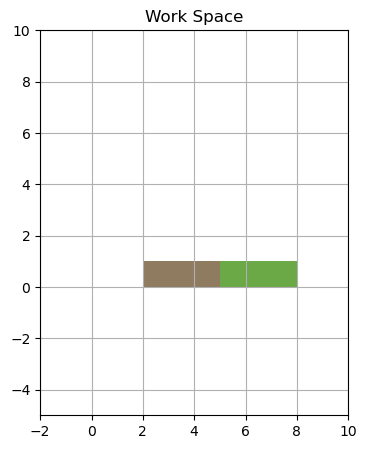

In [139]:
from shapely.geometry import Polygon, LineString,MultiPoint
import matplotlib.pyplot as plt
from shapely import affinity

robot_arm1 = MultiPoint([
    (2,0),
    (2, 1),
    (5, 1),
    (5,0)
]).convex_hull


big_poly = MultiPoint([
    (2,0),
    (2, 1),
    (8, 1),
    (8,0)
]).convex_hull


points = list(set(big_poly.exterior.coords).difference(set(robot_arm1.exterior.coords))) + list(
set(robot_arm1.exterior.coords).difference(set(big_poly.exterior.coords)))

print(points)
top_arm = MultiPoint(list(points)).convex_hull

# print(set(big_poly.exterior.coords).difference(set(robot_arm1.exterior.coords)))
# print(set(robot_arm1.exterior.coords).difference(set(big_poly.exterior.coords)))


fig,ax = plt.subplots(figsize=(5,5))
ax.fill(*robot_arm1.exterior.xy)
ax.fill(*big_poly.exterior.xy,alpha=.5)
ax.fill(*top_arm.exterior.xy,alpha=.7)


ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([-5,10])
ax.set_aspect( 1 )
# ax.add_artist(obstacle_2)
# ax.add_artist(obstacle_3)
plt.grid()


[(1.0, 3.0), (1.0, 6.0), (2.0, 3.0), (2.0, 6.0)]
(1.0, 3.0)


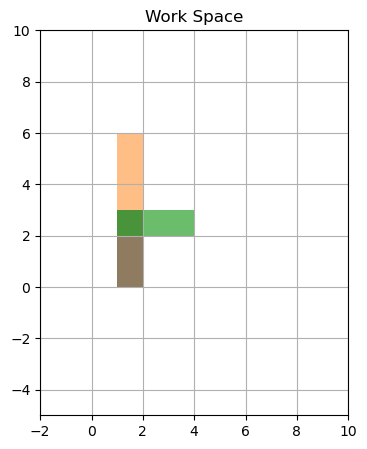

In [164]:
from shapely.geometry import Polygon, LineString,MultiPoint
import matplotlib.pyplot as plt
from shapely import affinity

robot_arm1 = MultiPoint([
    (2,0),
    (2, 1),
    (5, 1),
    (5,0)
]).convex_hull


big_poly = MultiPoint([
    (2,0),
    (2, 1),
    (8, 1),
    (8,0)
]).convex_hull

ref_pt = (2,0)

robot_arm1 = affinity.rotate(robot_arm1,90,ref_pt)
big_poly = affinity.rotate(big_poly,90,ref_pt)


points = list(set(big_poly.exterior.coords).difference(set(robot_arm1.exterior.coords))) + list(
set(robot_arm1.exterior.coords).difference(set(big_poly.exterior.coords)))

# print(points)
sorted_pts = sorted(points,key=lambda x: (x[0],x[1]))
print(sorted_pts)
print(sorted_pts[0])
top_arm = MultiPoint(list(points)).convex_hull
top_arm = affinity.rotate(top_arm,-90,sorted_pts[0])

fig,ax = plt.subplots(figsize=(5,5))
ax.fill(*robot_arm1.exterior.xy)
ax.fill(*big_poly.exterior.xy,alpha=.5)
ax.fill(*top_arm.exterior.xy,alpha=.7)


ax.set_title("Work Space")
ax.set_xlim([-2,10])
ax.set_ylim([-5,10])
ax.set_aspect( 1 )
plt.grid()


In [ ]:
def calculate_cobs(comb_poly,arm_1,q_1,q_2,ref_pt,obstacles):
    for i in range(q_1[0],q_1[1]+1):
        rotated_big_poly = affinity.rotate(comb_poly,i,ref_pt)
        rotated_arm_1 = affinity.rotate(arm_1,i,ref_pt)
        for j in range(q1[0],q1[1],-1):
            for obstacle in obstacles:
                arm_2_points = list(set(big_poly.exterior.coords).difference(set(robot_arm1.exterior.coords))) + \
                list(set(robot_arm1.exterior.coords).difference(set(big_poly.exterior.coords)))
                sorted_pts = sorted(arm_2_points,key=lambda x: (x[0],x[1]))
                arm_2 = MultiPoint(list(points)).convex_hull
                rotated_arm_2 = affinity.rotate(top_arm,j,sorted_pts[0])
                if rotated_arm_1.intersects(obstacle) or :
                

[]

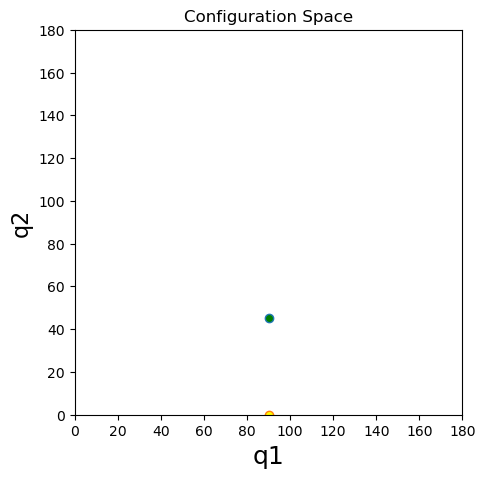

In [141]:
import matplotlib.pyplot as plt


fig,ax = plt.subplots(figsize=(5,5))

ax.set_title("Configuration Space")
ax.set_xlim([0,180])
ax.set_ylim([0,180])
plt.xlabel('q1', fontsize=18)
plt.ylabel('q2', fontsize=16)
goal = [[90],[45]]
start = [[90],[0]]
ax.plot(goal[0],goal[1],marker="o",markerfacecolor="green")
ax.plot(start[0],start[1],marker="o",markerfacecolor="yellow")

plt.plot()
